In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Evaluation-Gem5-Sheet3.csv")

In [4]:
data.rename(columns = {'1K-DDR':'DDR_1K', '1K-PIM':'PIM_1K', 
                    '64K-DDR':'DDR_64K', '64K-PIM':'PIM_64K','8M-DDR':'DDR_8M','8M-PIM':'PIM_8M',
                    '16M-DDR':'DDR_16M', '16M-PIM':'PIM_16M'}, inplace = True) 

In [5]:
data

,Attributes,DDR_1K,PIM_1K,DDR_64K,PIM_64K,DDR_8M,PIM_8M,DDR_16M,PIM_16M
0,system.cpu.icache.overall_accesses::total,5.358522e+09,1.534776e+07,3.504842e+09,2.894710e+05,3.477037e+09,1.843500e+04,3.478236e+09,1.755200e+04
1,system.cpu.dcache.overall_accesses::total,2.057118e+09,4.267030e+06,1.402846e+09,8.554600e+04,1.393634e+09,6.754000e+03,1.394642e+09,6.500000e+03
2,system.l2.overall_accesses::total,1.775050e+05,7.896800e+04,1.958090e+05,2.124000e+03,6.565970e+05,9.760000e+02,7.875690e+05,9.720000e+02
3,system.l2.overall_miss_latency::total,7.571867e+10,1.889110e+05,2.416070e+08,3.025890e+08,6.336110e+10,1.386960e+08,7.571867e+10,1.380240e+08
4,system.membus.reqLayer0.occupancy,3.806100e+07,7.469700e+05,2.648000e+06,2.122000e+04,2.560568e+09,9.750000e+03,3.346463e+09,9.710000e+03
5,system.membus.respLayer0.occupancy,2.008530e+08,3.734850e+06,1.403225e+07,1.061000e+05,3.516966e+09,4.875000e+04,4.205852e+09,4.855000e+04
6,system.cpu.numCycles,1.483799e+10,5.006792e+07,9.820262e+09,1.058629e+06,9.806673e+09,1.918670e+05,9.823837e+09,1.889110e+05
7,system.l2.overall_hits::total,1.394440e+05,4.271000e+03,1.931610e+05,2.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
8,system.l2.overall_misses::total,3.806100e+04,7.469700e+04,2.648000e+03,2.122000e+03,6.565940e+05,9.750000e+02,7.875660e+05,9.710000e+02
9,system.membus.power_state.pwrStateResidencyTicks,1.483799e+13,1.462738e+13,9.820262e+12,9.645179e+12,9.806673e+12,9.620959e+12,9.823837e+12,9.636310e+12


In [6]:
plt.rcParams['figure.figsize'] = (12,9)
workloads = ['1K','64K','8M','16M']

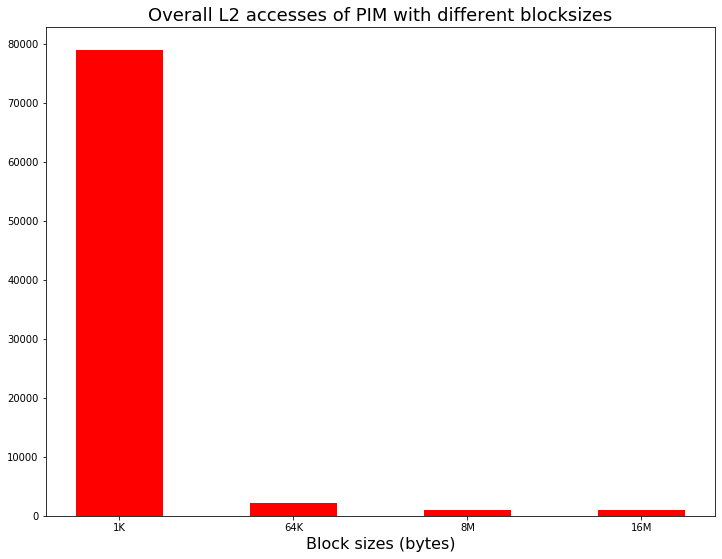

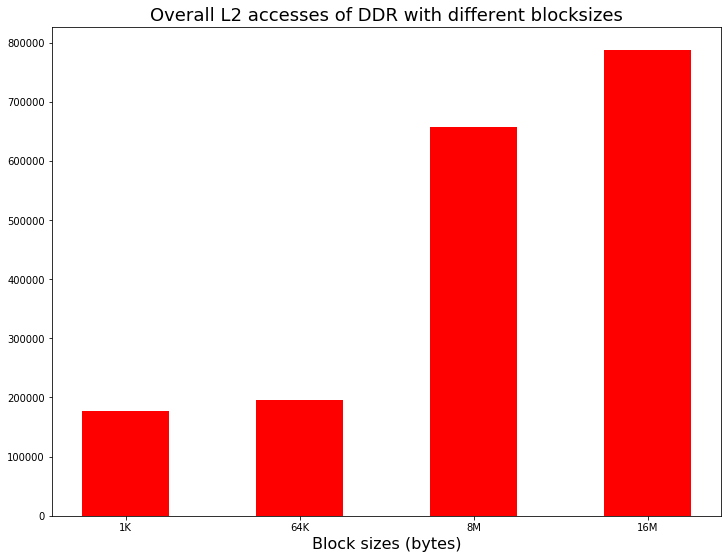

In [7]:
#BAR GRAPHS

#Overall L2 accesses

li = data.loc[data["Attributes"]=="system.l2.overall_accesses::total"]
for index, rows in li.iterrows(): 
    l2_accesses = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, l2_accesses[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()

plt.bar(workloads, l2_accesses[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()

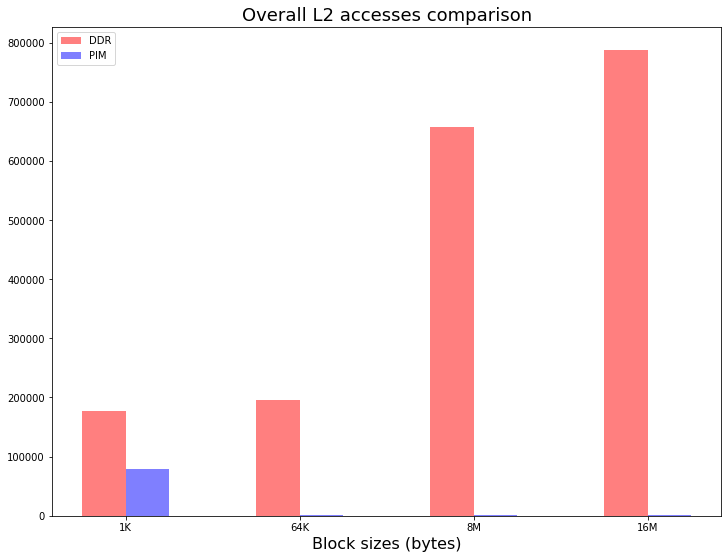

In [8]:
#GROUPED BAR GRAPHS
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, l2_accesses[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], l2_accesses[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Overall L2 accesses comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

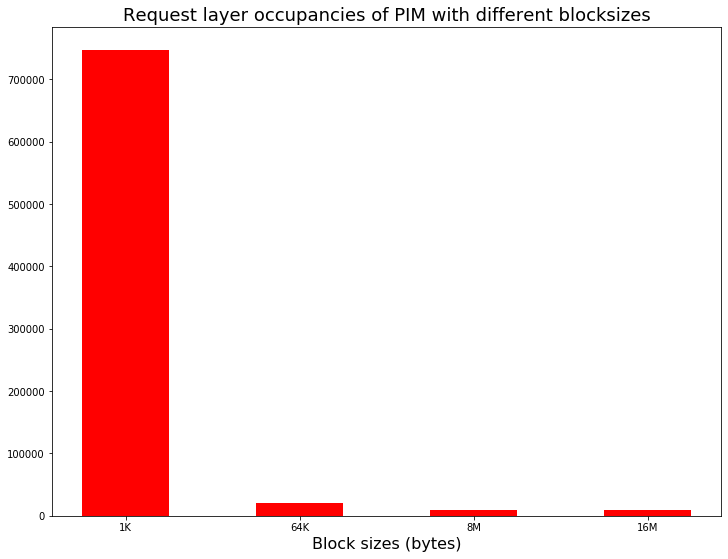

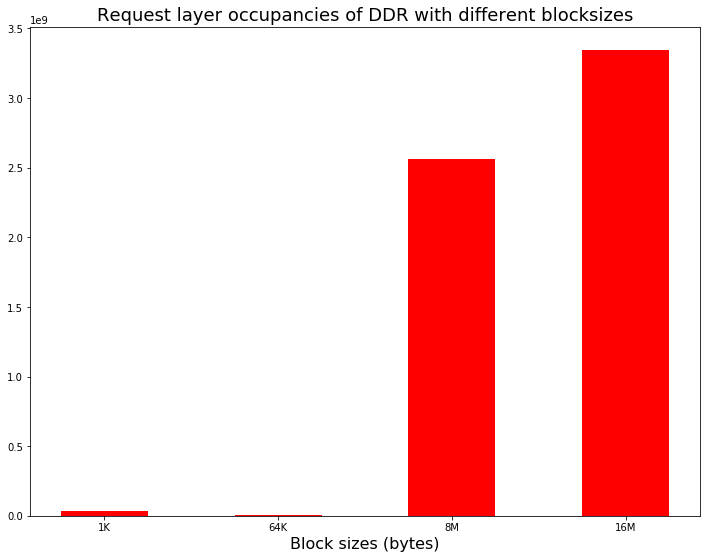

In [9]:
#Request layer occupancies
li = data.loc[data["Attributes"]=="system.membus.reqLayer0.occupancy"]
for index, rows in li.iterrows(): 
    reqlayer_occ = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, reqlayer_occ[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Request layer occupancies of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, reqlayer_occ[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Request layer occupancies of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

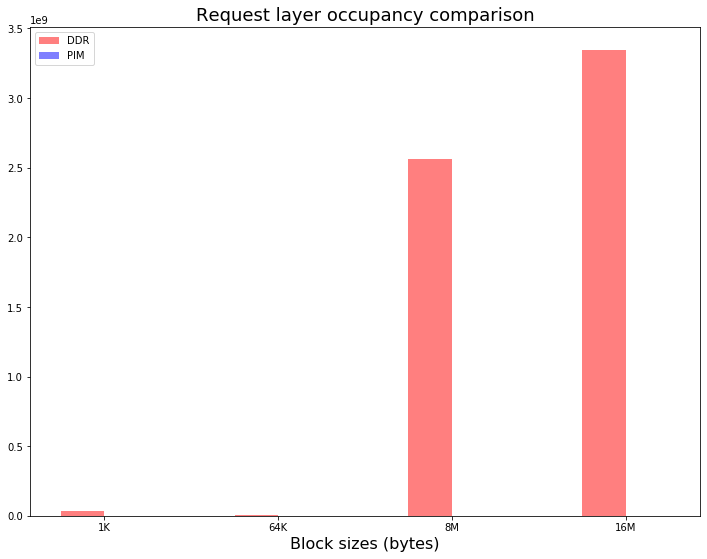

In [10]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, reqlayer_occ[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], reqlayer_occ[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Request layer occupancy comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid()
plt.show()

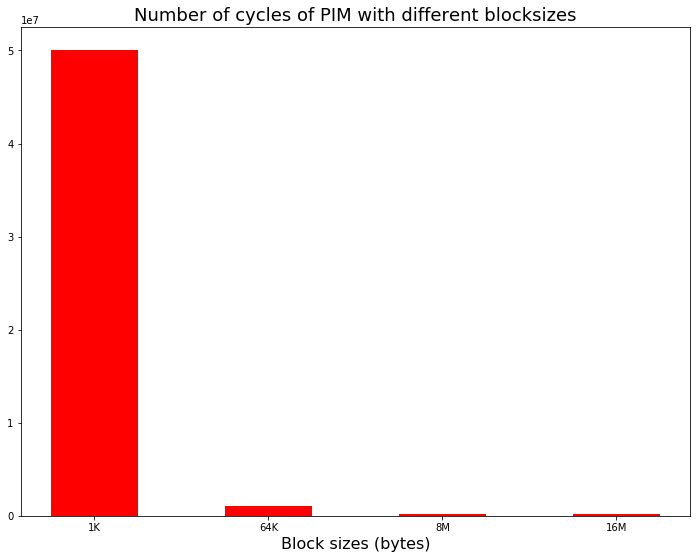

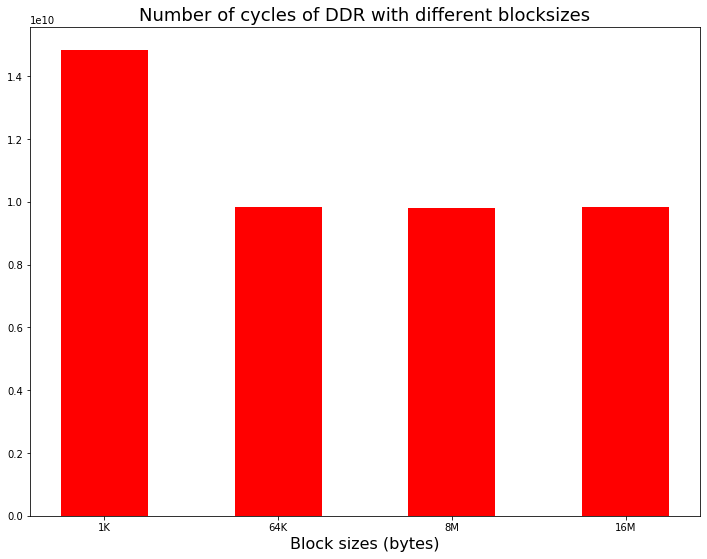

In [11]:
li = data.loc[data["Attributes"]=="system.cpu.numCycles"]
for index, rows in li.iterrows(): 
    num_cycles = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, num_cycles[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Number of cycles of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, num_cycles[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Number of cycles of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

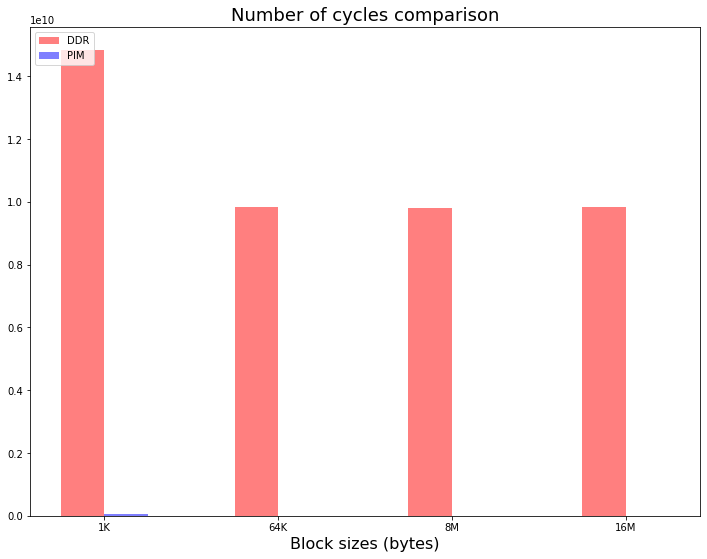

In [12]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, num_cycles[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], num_cycles[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Number of cycles comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

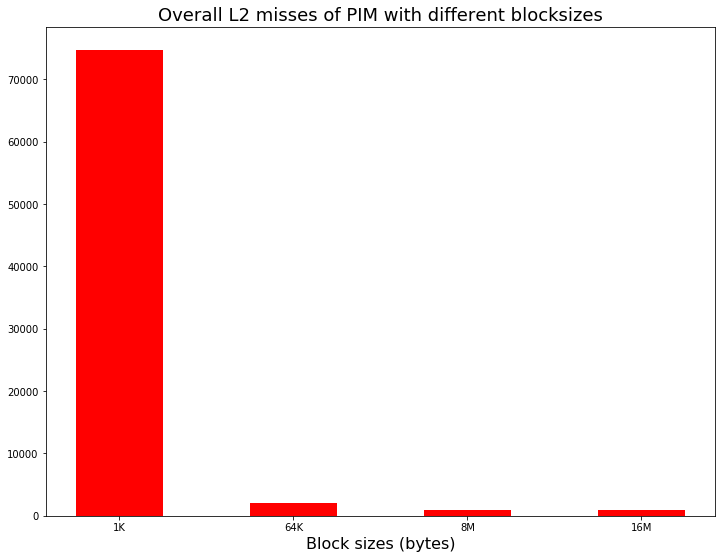

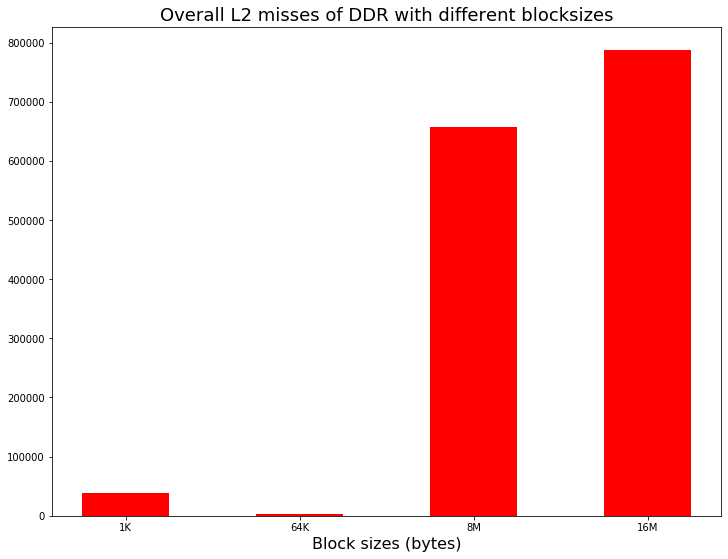

In [13]:
li = data.loc[data["Attributes"]=="system.l2.overall_misses::total"]
for index, rows in li.iterrows(): 
    ovr_misses = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, ovr_misses[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 misses of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, ovr_misses[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 misses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

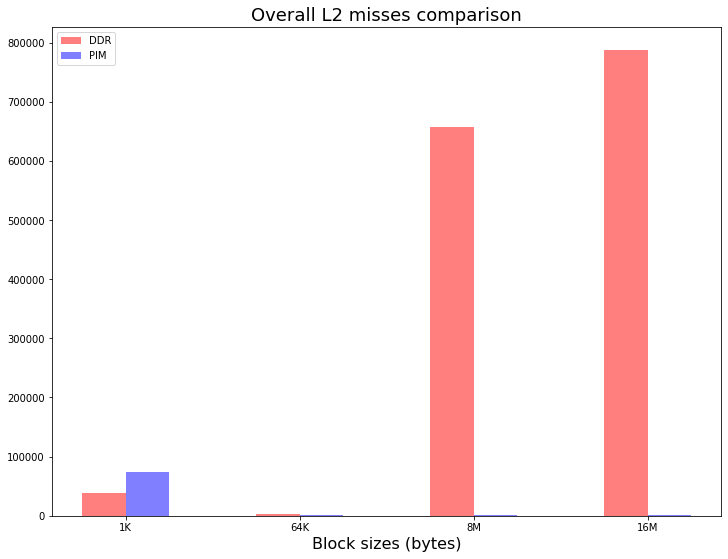

In [14]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, ovr_misses[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], ovr_misses[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Overall L2 misses comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

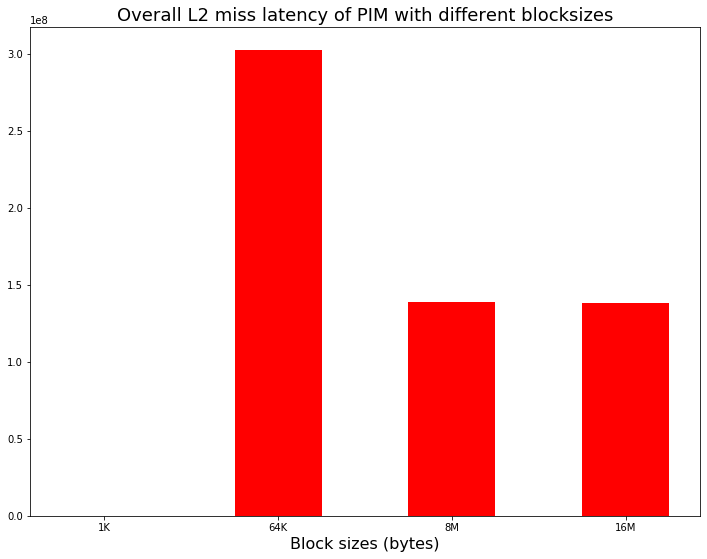

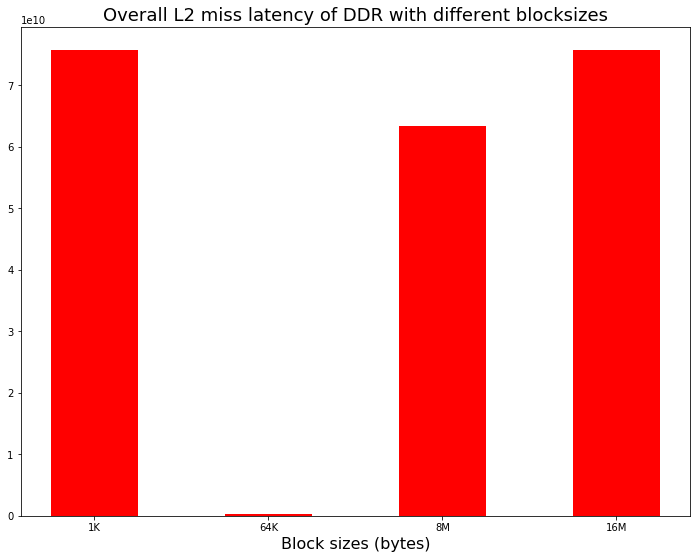

In [15]:
li = data.loc[data["Attributes"]=="system.l2.overall_miss_latency::total"]
for index, rows in li.iterrows(): 
    l2_misslat = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, l2_misslat[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 miss latency of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, l2_misslat[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 miss latency of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

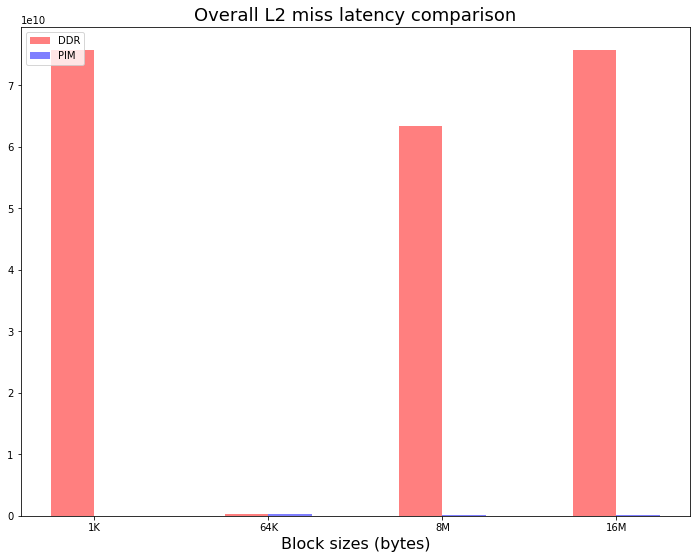

In [16]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, l2_misslat[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], l2_misslat[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Overall L2 miss latency comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

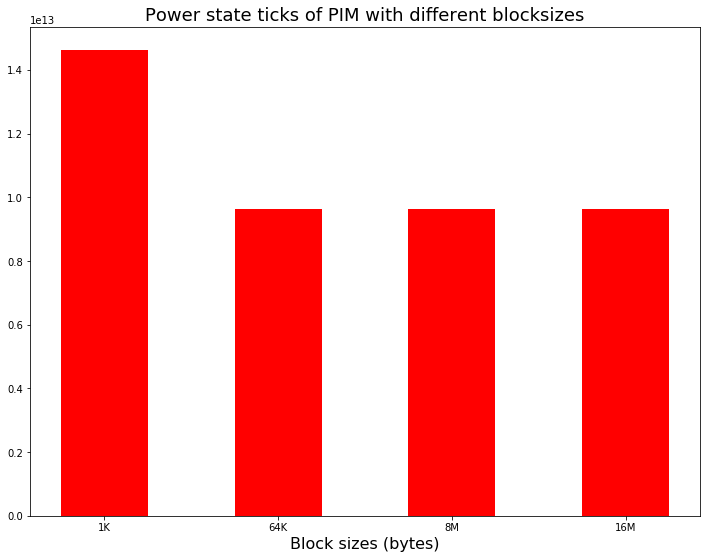

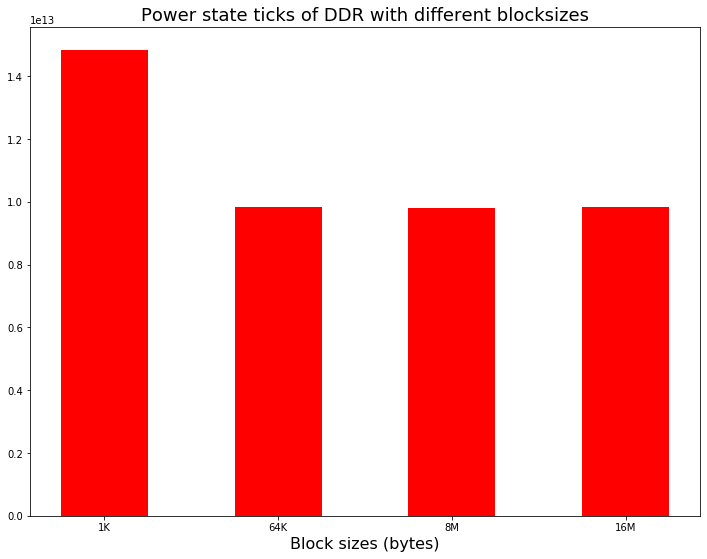

In [17]:
li = data.loc[data["Attributes"]=="system.membus.power_state.pwrStateResidencyTicks"]
for index, rows in li.iterrows(): 
    pow_ticks = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, pow_ticks[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Power state ticks of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, pow_ticks[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Power state ticks of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

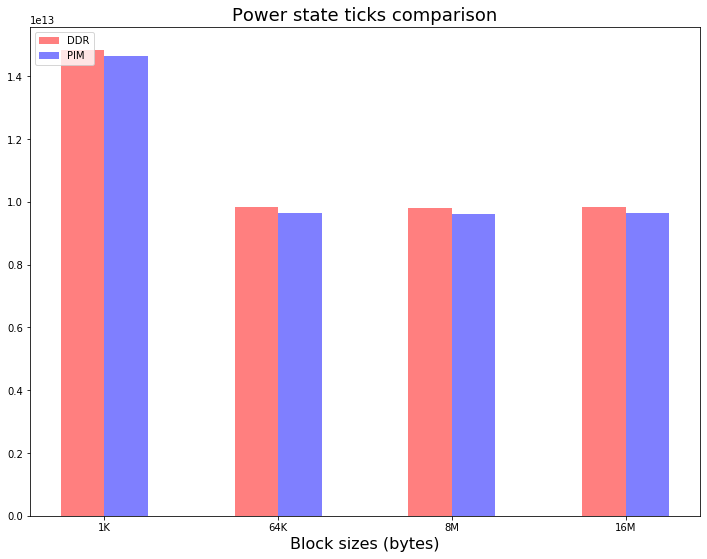

In [18]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, pow_ticks[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], pow_ticks[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Power state ticks comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

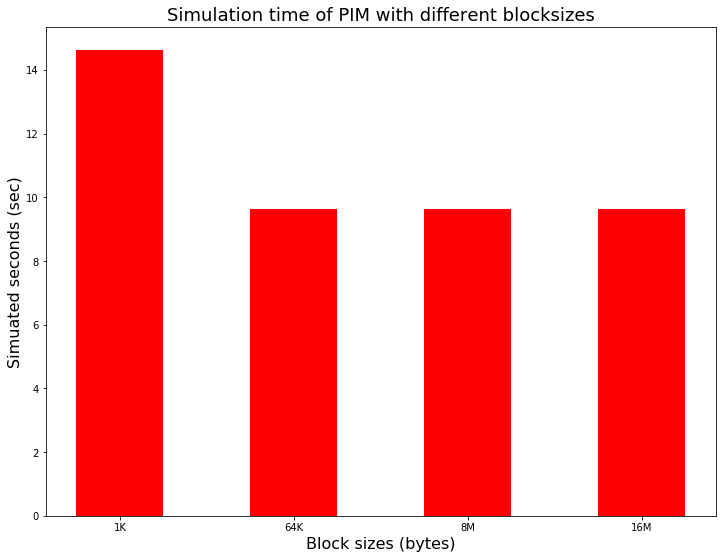

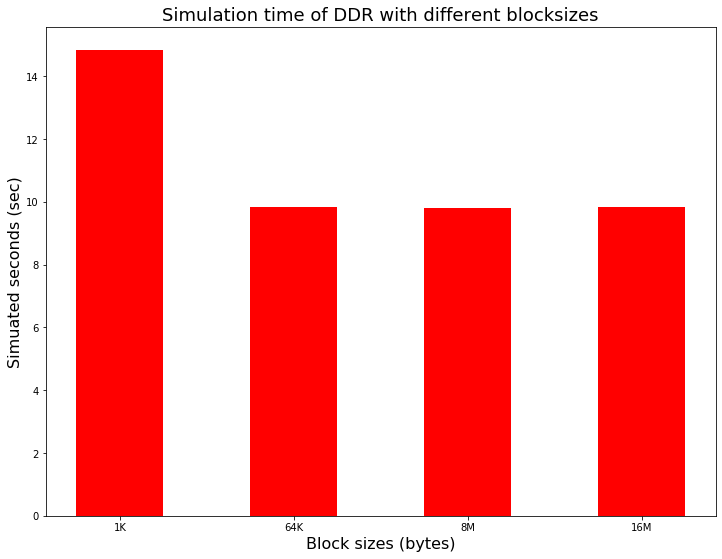

In [19]:
li = data.loc[data["Attributes"]=="sim_seconds (DDR vs PIM)"]
for index, rows in li.iterrows(): 
    sim_sec = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, sim_sec[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Simulation time of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.ylabel('Simuated seconds (sec)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, sim_sec[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Simulation time of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.ylabel('Simuated seconds (sec)', fontsize=16)
# plt.grid(True)
plt.show()

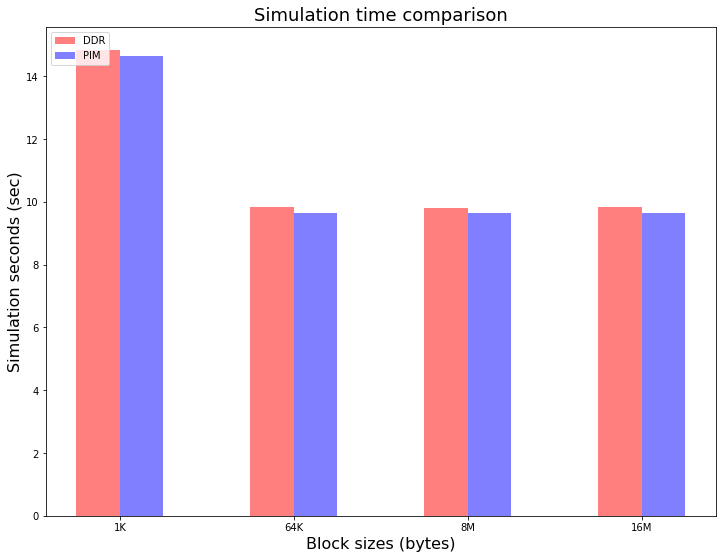

In [20]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, sim_sec[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], sim_sec[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Simulation time comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.ylabel('Simulation seconds (sec)', fontsize=16)
# plt.grid()
plt.show()

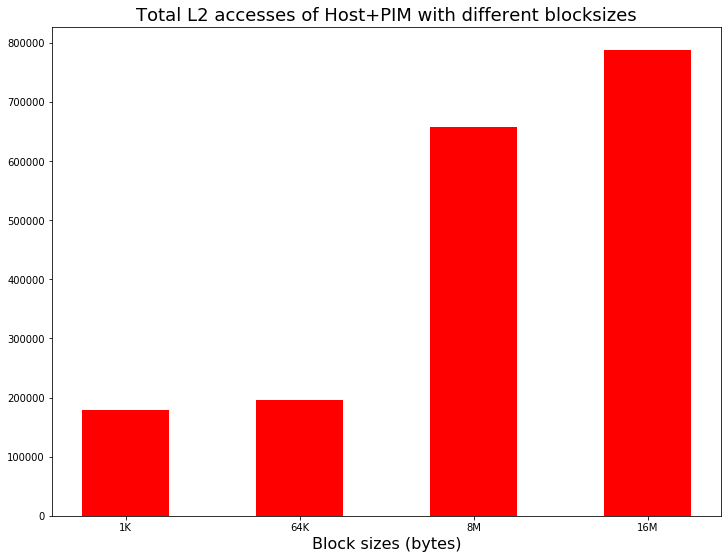

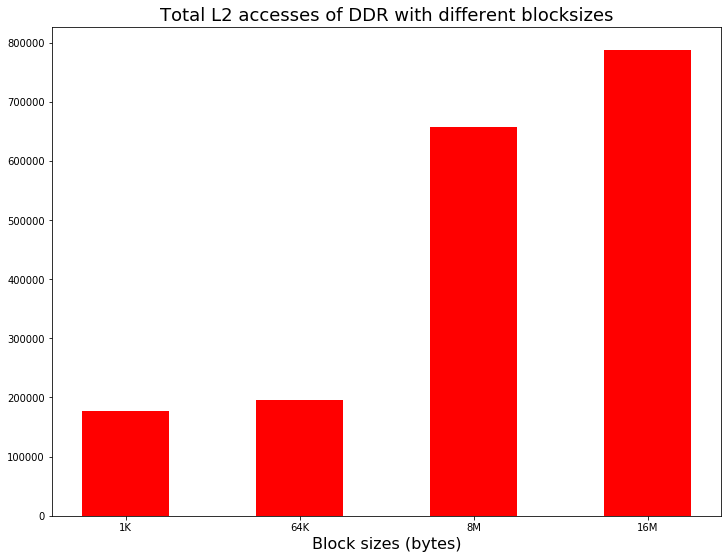

In [21]:
li = data.loc[data["Attributes"]=="Total L2 access(DDR vs DDR+PIM)"]
for index, rows in li.iterrows(): 
    totl2 = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, totl2[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Total L2 accesses of Host+PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, totl2[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Total L2 accesses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

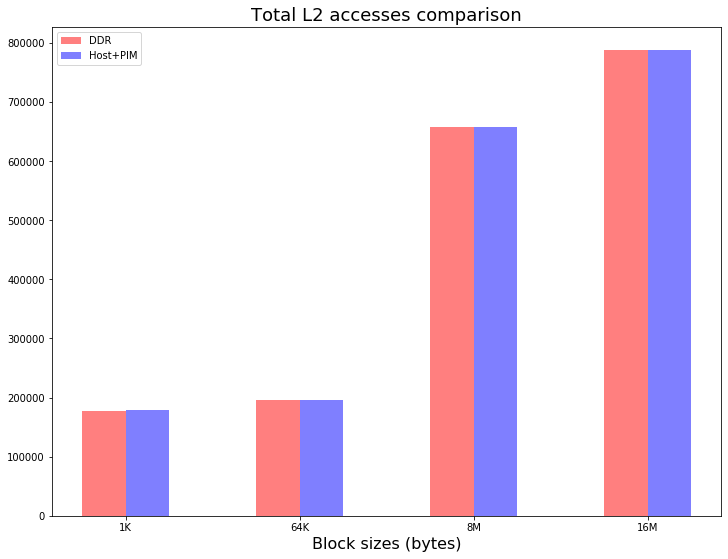

In [22]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, totl2[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], totl2[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Total L2 accesses comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','Host+PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid()
plt.show()

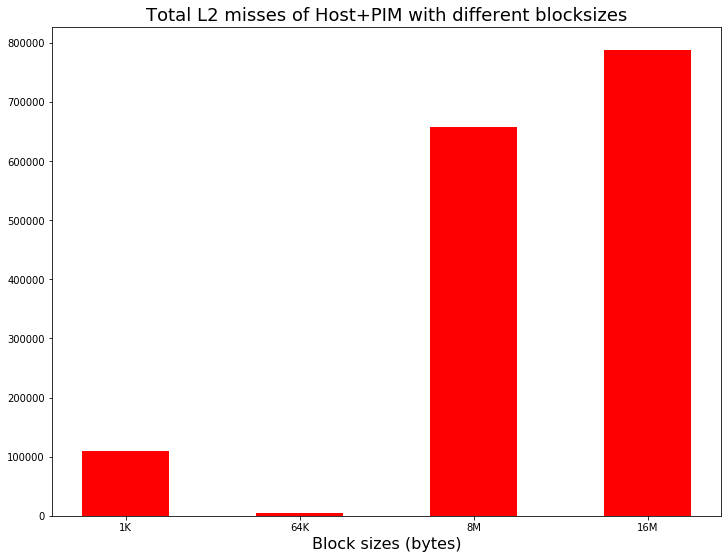

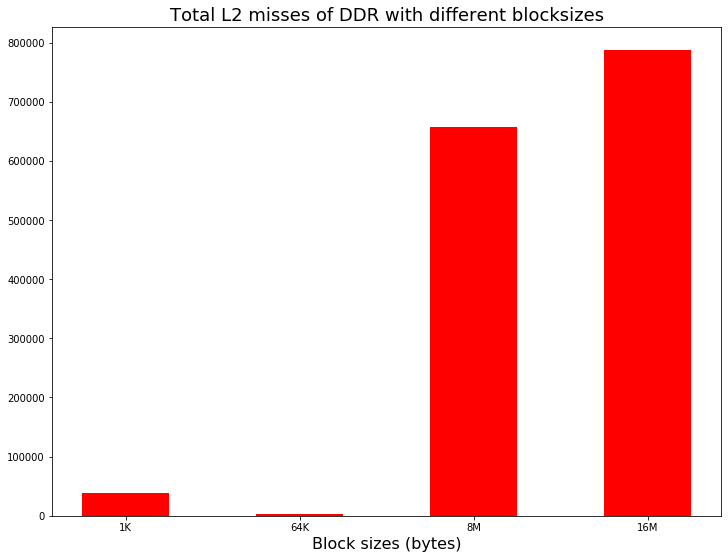

In [23]:
li = data.loc[data["Attributes"]=="Total L2 misses(DDR vs DDR+PIM)"]
for index, rows in li.iterrows(): 
    totl2miss = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, totl2miss[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Total L2 misses of Host+PIM with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

plt.bar(workloads, totl2miss[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Total L2 misses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid(True)
plt.show()

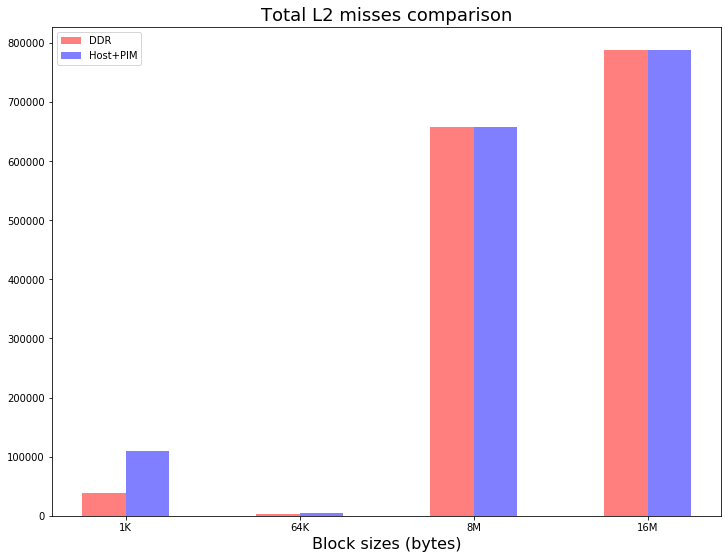

In [24]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, totl2miss[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], totl2miss[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Total L2 misses comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','Host+PIM'], loc='upper left')
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid()
plt.show()